In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Read training data file
trainfile = 'Santander Customer Satisfaction - TRAIN.csv'
trainData = pd.read_csv(trainfile)

# Read test data file
testfile = 'Santander Customer Satisfaction - TEST-Without TARGET.csv'
testData = pd.read_csv(testfile)

In [48]:
trainData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [49]:
print(trainData.shape)
print(testData.shape)

(76020, 371)
(75818, 370)


In [50]:
#Understanding the Columns
trainData.info()
print("=======")
# To check basic statistics of a data set, column wise
trainData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [52]:
trainData.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [53]:
# Split dataset
Xtrain = trainData.drop("TARGET", axis=1)
Ytrain = trainData["TARGET"]
print(Ytrain.value_counts())


TARGET
0    73012
1     3008
Name: count, dtype: int64


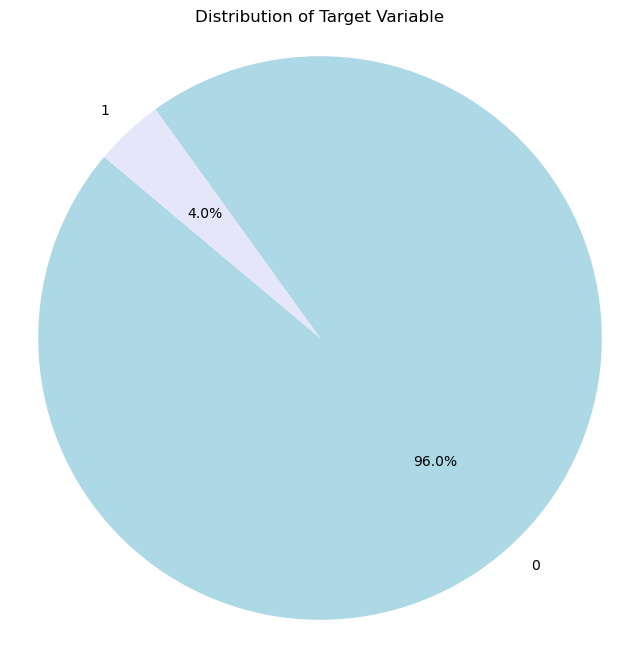

In [54]:
target_counts = Ytrain.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['#add8e6','#e6e6fa'])
plt.axis('equal')
plt.title('Distribution of Target Variable')
plt.show()

In [55]:
smote = SMOTE(random_state=28)
x_res, y_res = smote.fit_resample(Xtrain, Ytrain)
print(y_res.value_counts())


TARGET
0    73012
1    73012
Name: count, dtype: int64


In [57]:
# Function to train and evaluate a model
def evaluate_model(model, X_train, X_test, Y_train, Y_test, testData, filename):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Model Accuracy
    print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
    print(f"Precision: {precision_score(Y_test, Y_pred)}")
    print(f"Recall: {recall_score(Y_test, Y_pred)}")
    print(f"F1 Score: {f1_score(Y_test, Y_pred)}")
    print(f"ROC-AUC Score: {roc_auc_score(Y_test, Y_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(Y_test, Y_pred)}")
    
    # Predict on test data
    test_pred = model.predict(testData)
    submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
    submission.to_csv(filename, index=False)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=7)

In [58]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=15, max_features=50, max_leaf_nodes=50, class_weight="balanced", random_state=10)
evaluate_model(dt, X_train, X_test, Y_train, Y_test, testData, 'ModelDT.csv')

Accuracy: 0.882246190720767
Precision: 0.8854829781345143
Recall: 0.8776489952678143
F1 Score: 0.8815485826473324
ROC-AUC Score: 0.8822394319883928
Confusion Matrix:
 [[12969  1655]
 [ 1784 12797]]


In [59]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=7)
evaluate_model(gb, X_train, X_test, Y_train, Y_test, testData, 'ModelGB.csv')

Accuracy: 0.9202876219825372
Precision: 0.9070493654906651
Recall: 0.9362869487689459
F1 Score: 0.9214362850971922
ROC-AUC Score: 0.920311143968718
Confusion Matrix:
 [[13225  1399]
 [  929 13652]]


In [60]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=7)
evaluate_model(rf, X_train, X_test, Y_train, Y_test, testData, 'ModelRF.csv')

Accuracy: 0.9644239000171203
Precision: 0.9646582486961296
Recall: 0.9640628214800082
F1 Score: 0.9643604431790896
ROC-AUC Score: 0.9644233691645118
Confusion Matrix:
 [[14109   515]
 [  524 14057]]


In [61]:
# Hyperparameter tuning for Decision Tree using GridSearchCV
param_grid = {
    'max_depth': [15, 20],
    'max_features': [45, 50, 55, "sqrt"],
    'max_leaf_nodes': [45, 50, 55],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=7), param_grid, scoring=make_scorer(f1_score), cv=5, n_jobs=-1, verbose=5)
grid_search.fit(x_res, y_res)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 3/5] END max_depth=15, max_features=45, max_leaf_nodes=45;, score=0.886 total time=   4.4s
[CV 2/5] END max_depth=15, max_features=45, max_leaf_nodes=50;, score=0.894 total time=   4.4s
[CV 5/5] END max_depth=15, max_features=45, max_leaf_nodes=45;, score=0.834 total time=   4.5s
[CV 4/5] END max_depth=15, max_features=45, max_leaf_nodes=45;, score=0.879 total time=   4.8s
[CV 3/5] END max_depth=15, max_features=45, max_leaf_nodes=50;, score=0.891 total time=   4.8s
[CV 2/5] END max_depth=15, max_features=45, max_leaf_nodes=45;, score=0.892 total time=   4.8s
[CV 1/5] END max_depth=15, max_features=45, max_leaf_nodes=45;, score=0.763 total time=   4.9s
[CV 1/5] END max_depth=15, max_features=45, max_leaf_nodes=50;, score=0.737 total time=   4.9s
[CV 4/5] END max_depth=15, max_features=45, max_leaf_nodes=50;, score=0.882 total time=   3.0s
[CV 5/5] END max_depth=15, max_features=45, max_leaf_nodes=50;, score=0.821 total t

In [62]:
# Train the best Decision Tree model
best_dt = grid_search.best_estimator_
evaluate_model(best_dt, X_train, X_test, Y_train, Y_test, testData, 'ModelDT_Best.csv')


Accuracy: 0.8957712720424584
Precision: 0.8879548052996167
Recall: 0.9054934503806323
F1 Score: 0.8966383701188455
ROC-AUC Score: 0.8957855654528981
Confusion Matrix:
 [[12958  1666]
 [ 1378 13203]]


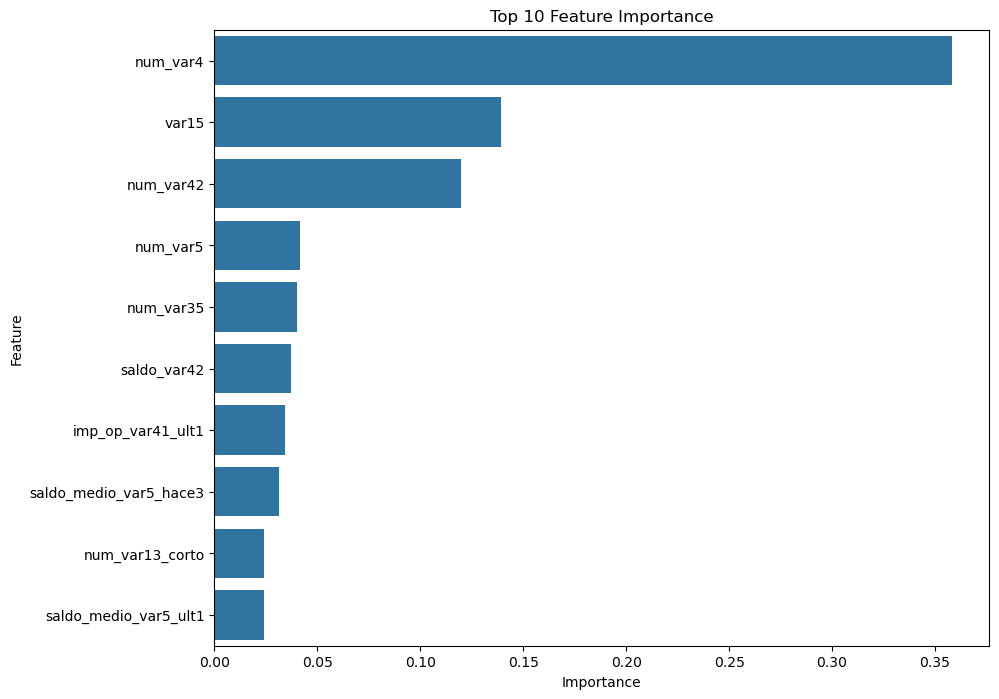

In [63]:
# Feature Importance
importances = best_dt.feature_importances_
feature_names = Xtrain.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)

# Plot top 10 important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


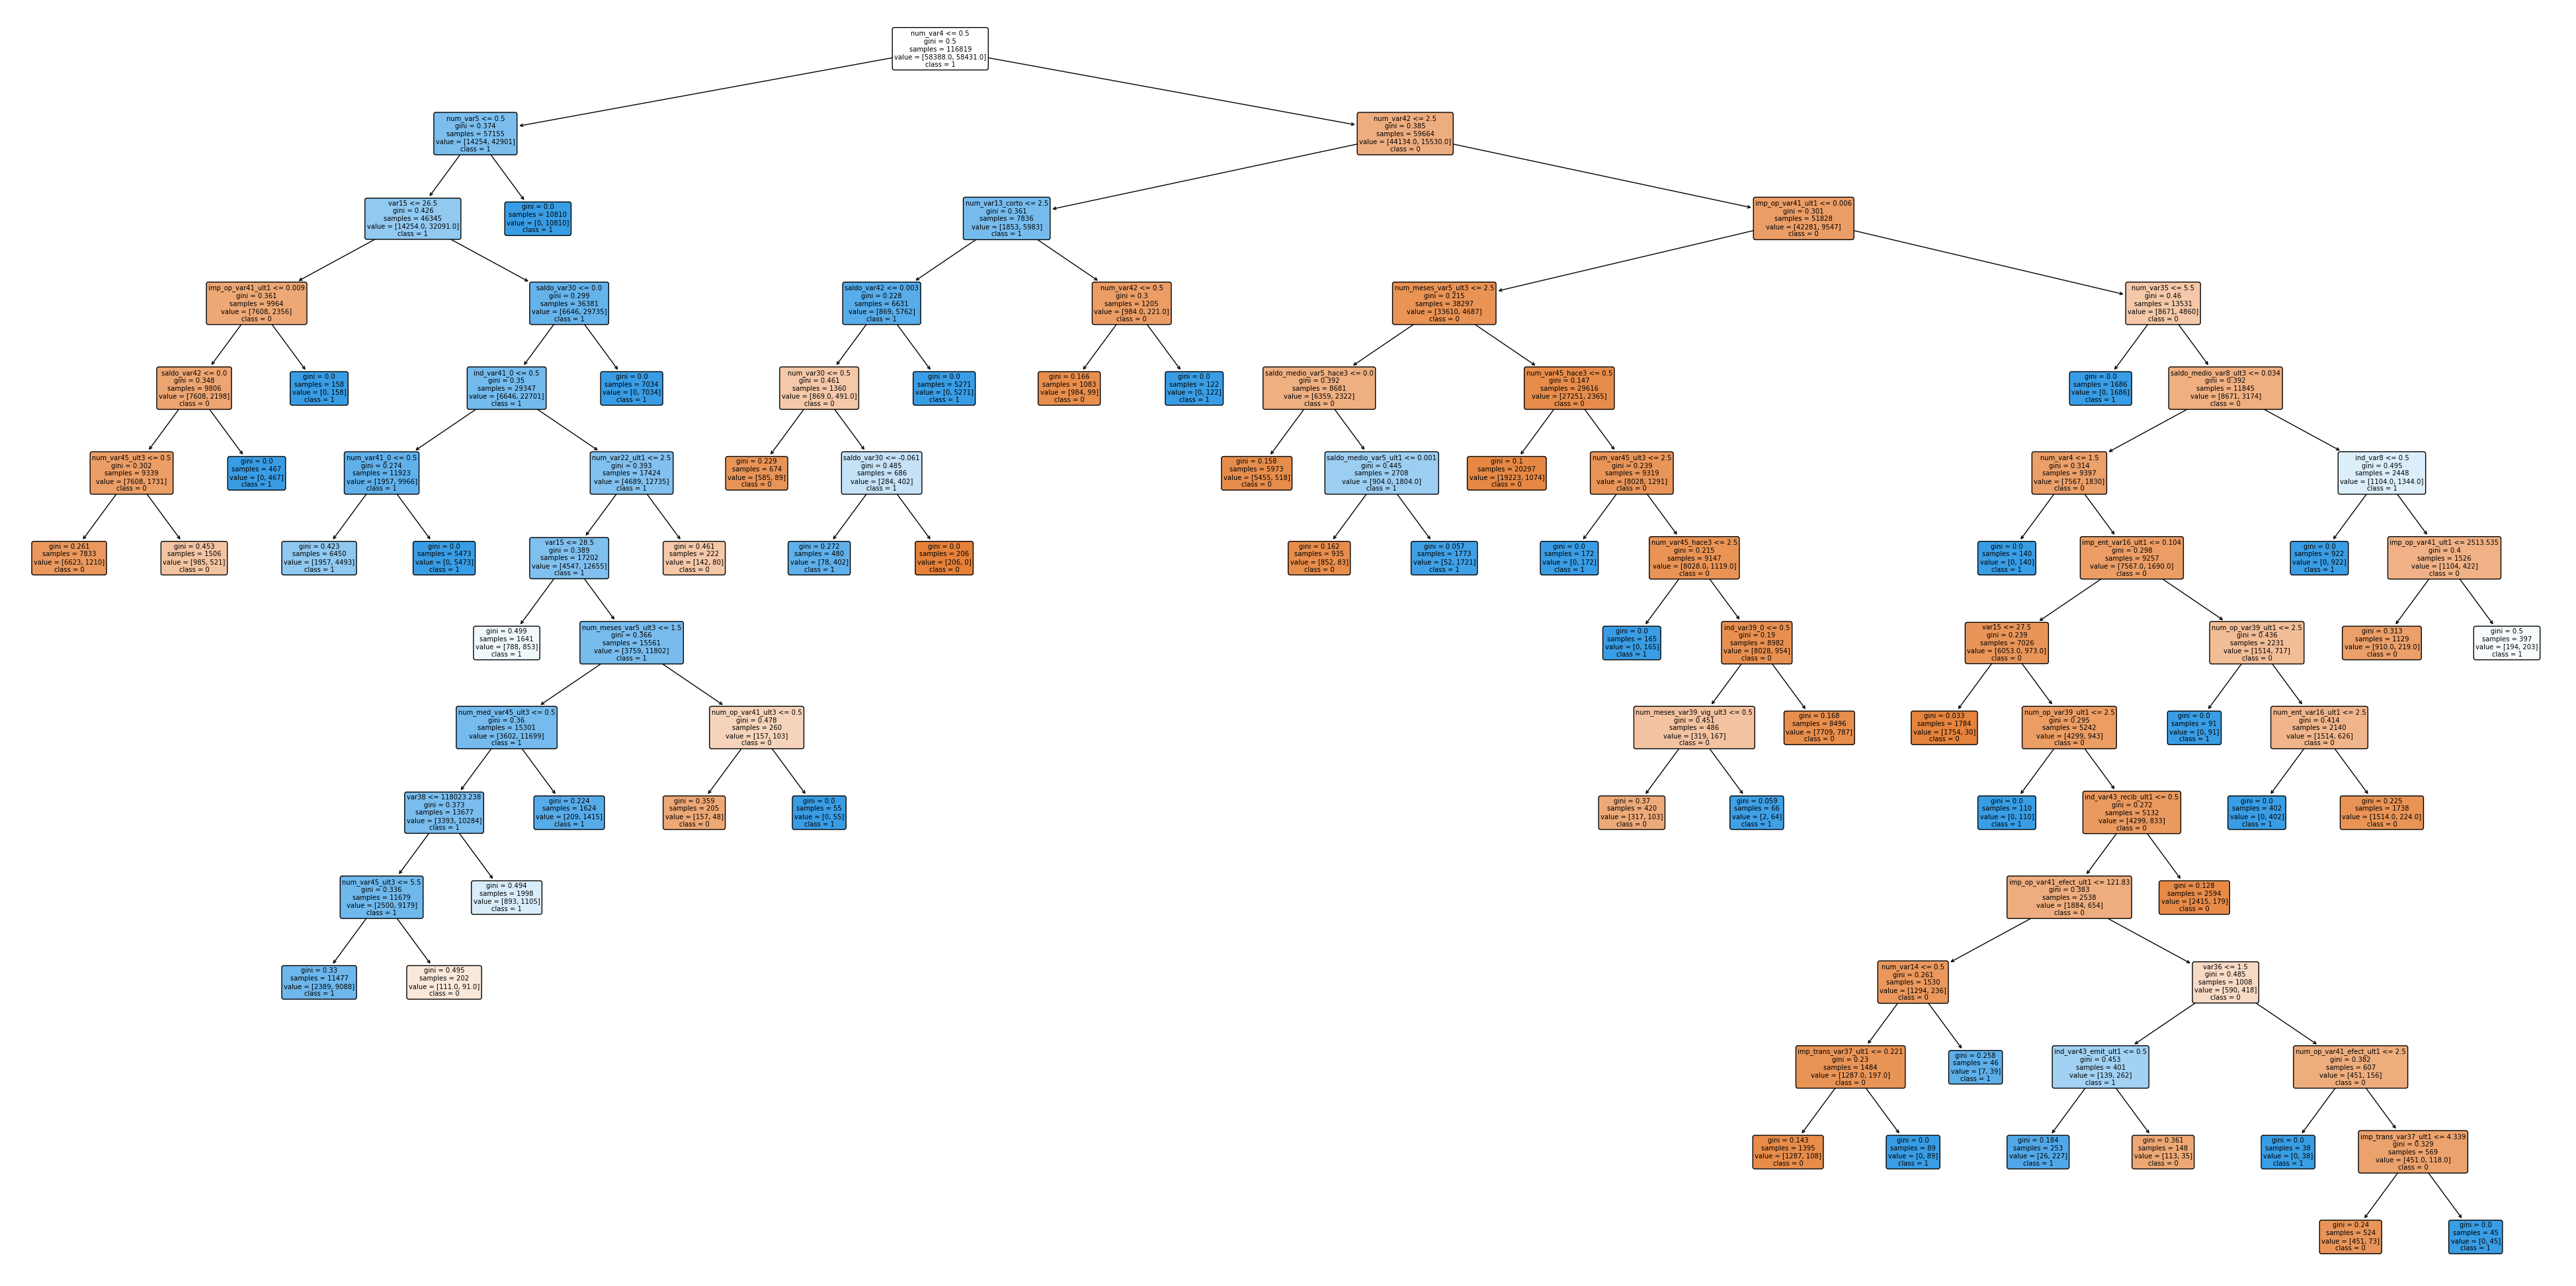

In [65]:
# Visualize the best decision tree
plt.figure(figsize=(50, 25))
plot_tree(best_dt, filled=True, feature_names=Xtrain.columns, class_names=[str(c) for c in best_dt.classes_], rounded=True)
plt.show()